# Analysis of the results

In [16]:
import sys
sys.path.append("..")

from analysis.analysis_utils import extract_all_info_from_hdf5, get_phenotype_table_from_parameters
from analysis.dataset import Dataset
from analysis.link_measure import compute_mean_xhis
from analysis.pattern_measure import measure_frequency_diadic_pattern, measure_global_frequency_triadic_pattern, \
                                measure_diadic_pattern_combination, measure_triadic_pattern_phenotype_combination
from plot.dataset_plot import plot_hist_by_phenotype, plot_bar_diadic_pattern, plot_triadic_pattern_phenotype, \
                                plot_phenotype_combination_per_link, plot_phenotype_combination_per_triangle
from plot.plot import plot_xhi_by_phenotype
import matplotlib.pyplot as plt
import numpy as np

### Extracting all information from file

In [2]:
filepath = r"../out/E3O2P21R12T17_S75_T0.6_M1000_N10000000/E3O2P21R12T17_S75_T0.6_M1000_N10000000.h5"
adj_matrices, parameters = extract_all_info_from_hdf5(filepath)
niter = parameters["Number of interaction"]
phenotype_table = get_phenotype_table_from_parameters(parameters)

In [3]:
local_dt = Dataset('local')
local_dt.init_with_matrices(adj_matrices, parameters, niter)

### Analysis per phenotype

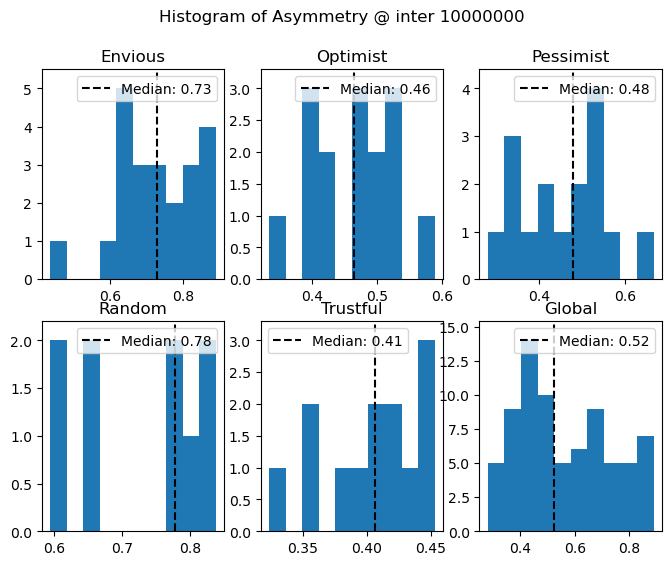

In [4]:
plot_hist_by_phenotype(local_dt, "Asymmetry")
plt.show()

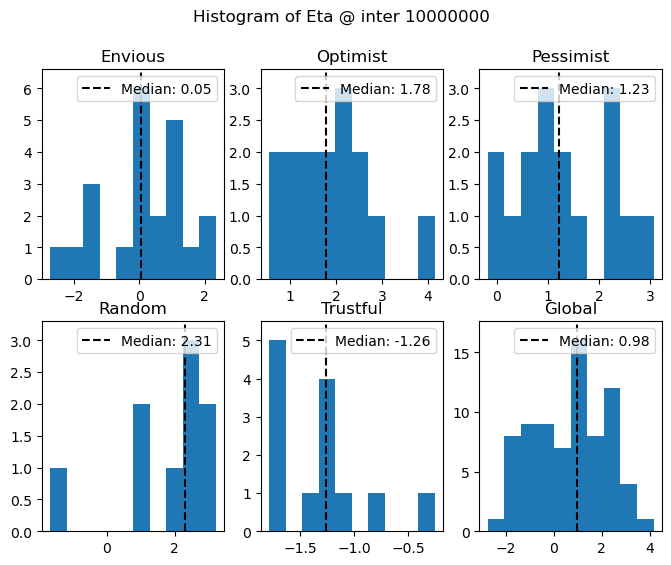

In [5]:
plot_hist_by_phenotype(local_dt, 'Eta')
plt.show()

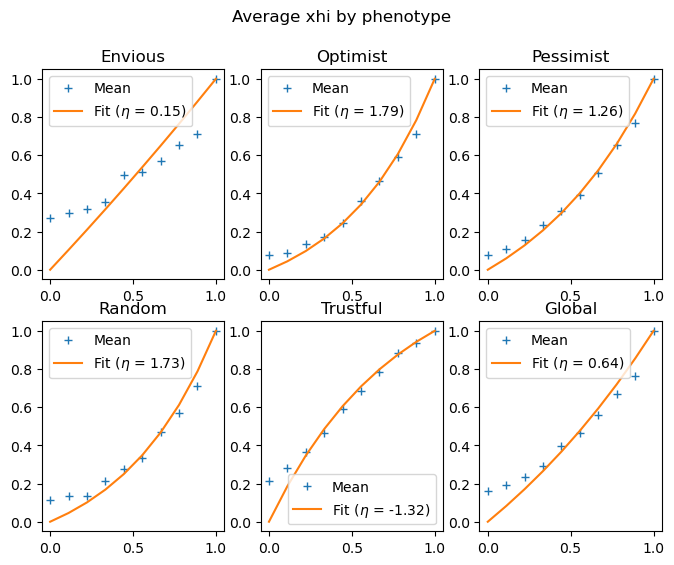

In [6]:
xhis = compute_mean_xhis(adj_matrices["peTotal"], parameters["Trust threshold"], phenotype_table)
plot_xhi_by_phenotype(xhis)
plt.show()

### Per game analysis

In [7]:
game_signature = "PD"

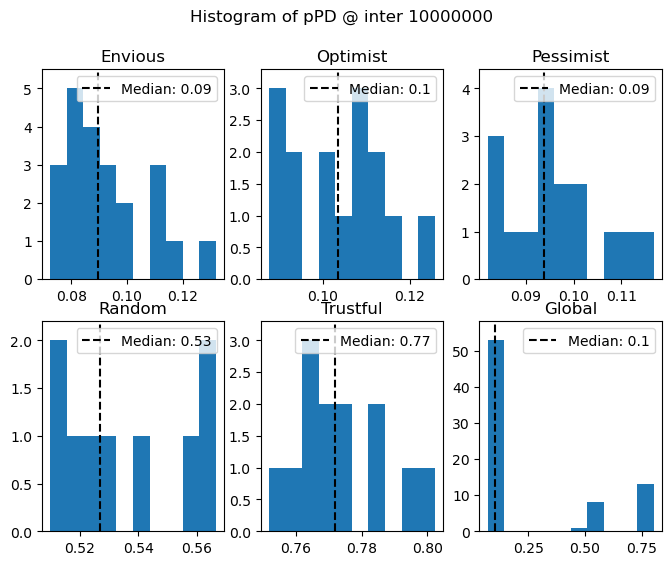

In [8]:
plot_hist_by_phenotype(local_dt, "p" + game_signature)
plt.show()

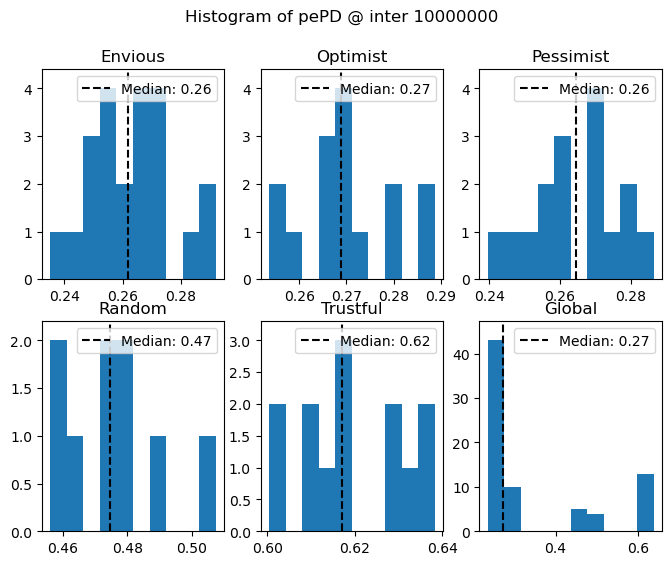

In [9]:
plot_hist_by_phenotype(local_dt, "pe" + game_signature)
plt.show()

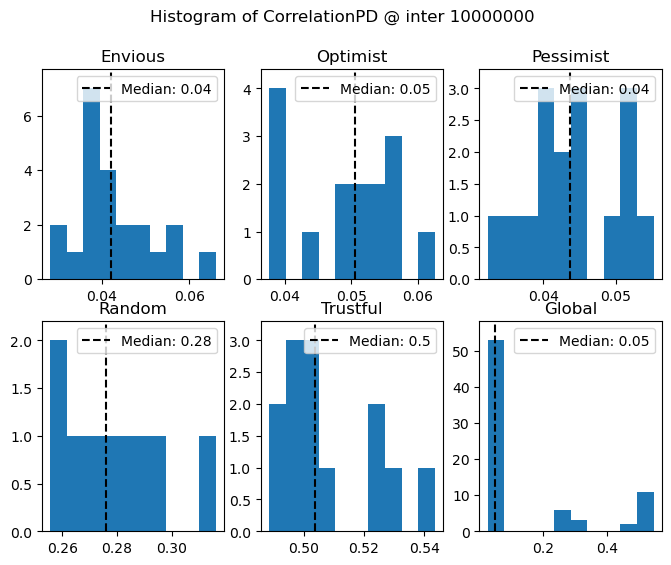

In [10]:
plot_hist_by_phenotype(local_dt, "Correlation" + game_signature)
plt.show()

### Diadic pattern

In [11]:
diadic_pattern = measure_frequency_diadic_pattern(adj_matrices["link"], parameters, niter)

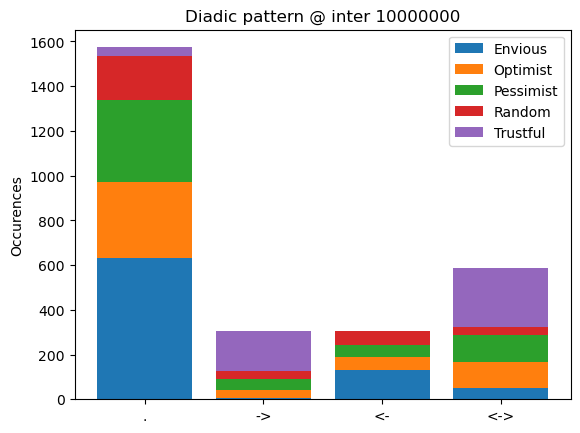

In [12]:
plot_bar_diadic_pattern(diadic_pattern)
plt.show()

In [17]:
link_phenotype_combination = measure_diadic_pattern_combination(adj_matrices["link"], phenotype_table, niter)

<Axes: title={'center': 'Phenotype combinations distribution for <- with threshold 10'}, ylabel='Occurence'>

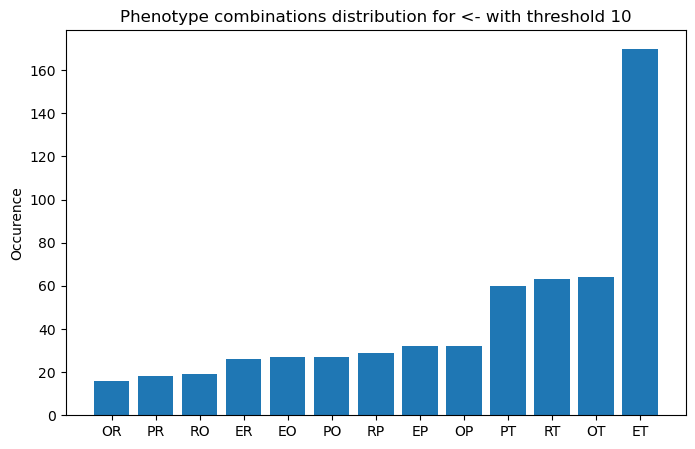

In [19]:
plot_phenotype_combination_per_link("<-", link_phenotype_combination, th=10)

### Triadic pattern

In [13]:
triadic_pattern = measure_global_frequency_triadic_pattern(adj_matrices["link"], parameters, niter)

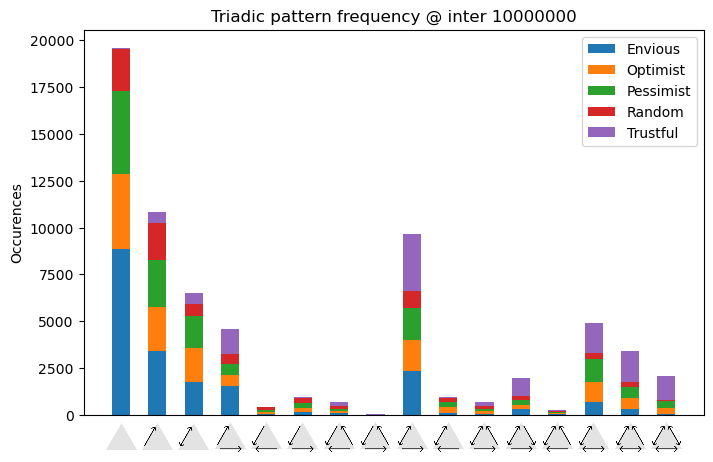

In [14]:
plot_triadic_pattern_phenotype(triadic_pattern, parameters)
plt.show()

In [20]:
triangle_phenotype_combination = measure_triadic_pattern_phenotype_combination(adj_matrices["link"], parameters, niter)

<Axes: title={'center': 'Phenotype combinations distribution for triangle 012111 with threshold 400'}, ylabel='Occurence'>

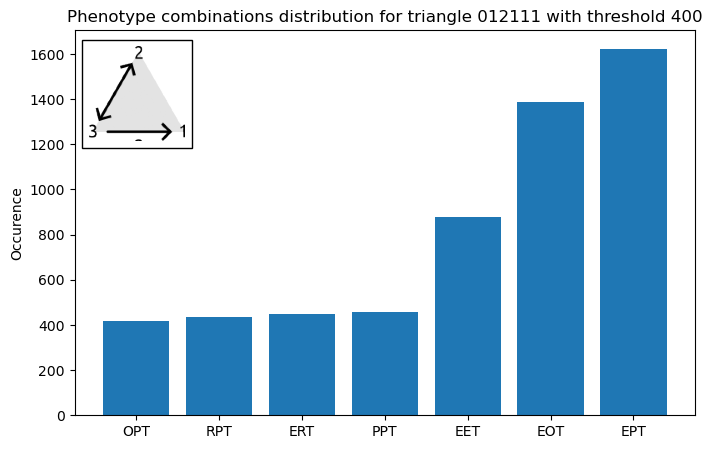

In [22]:
plot_phenotype_combination_per_triangle("012111", triangle_phenotype_combination, 400)